In [34]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [6]:
'HDF ist ein deutlich besseres Format als csv/txt/... -> Dateitypen + Index bleibt erhalten '
pollution = pd.read_hdf("Pollution_Data/pollutant_data.h5")
predictor = pd.read_hdf("Predictor_Data/all.h5")
#predictor.info()
pollution.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3924 entries, 2010-01-01 to 2022-09-30
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   mean_co        3914 non-null   float64 
 1   max_value_co   3914 non-null   float64 
 2   max_hour_co    3914 non-null   float64 
 3   mean_so2       3566 non-null   float64 
 4   max_value_so2  3566 non-null   float64 
 5   max_hour_so2   3566 non-null   float64 
 6   mean_no2       3630 non-null   float64 
 7   max_value_no2  3630 non-null   float64 
 8   max_hour_no2   3630 non-null   float64 
 9   mean_o3        3777 non-null   float64 
 10  max_value_o3   3777 non-null   float64 
 11  max_hour_o3    3777 non-null   float64 
 12  mean_pm2_5     3414 non-null   float64 
 13  aqi_pm2_5      3414 non-null   category
 14  aqi_so2        3566 non-null   category
 15  aqi_no2        3630 non-null   category
 16  aqi_o3         3777 non-null   category
 17  aqi_idxmax     

In [7]:
pollution.columns

Index(['mean_co', 'max_value_co', 'max_hour_co', 'mean_so2', 'max_value_so2',
       'max_hour_so2', 'mean_no2', 'max_value_no2', 'max_hour_no2', 'mean_o3',
       'max_value_o3', 'max_hour_o3', 'mean_pm2_5', 'aqi_pm2_5', 'aqi_so2',
       'aqi_no2', 'aqi_o3', 'aqi_idxmax', 'aqi_max'],
      dtype='object')

In [16]:
#nur numerische Columns (ohne wind_direction da in Grad, ohne UV_radiation da sehr ähnlich zu radiation)
# auch ohne elektricity denn dadurch mehr Daten
numeric_columns=['mean_wind_speed', 'max_value_wind_speed', 'max_hour_wind_speed', 'mean_temp', 'max_value_temp',
       'max_hour_temp', 'mean_humidity', 'max_value_humidity',
       'max_hour_humidity', 'mean_radiation', 'max_value_radiation',
       'max_hour_radiation', 
        'mean_pressure', 'max_value_pressure',
       'max_hour_pressure', 'rain', 't_max', 't_min', 't_minmax',
        'quarter',  'business_day']

quarter_dummi= pd.get_dummies(predictor["quarter"])
wind_dummi= pd.get_dummies(predictor["mean_wind_direction"])
predict_today=predictor[numeric_columns]
predict_today = predict_today.join(quarter_dummi)
predict_today = predict_today.join(wind_dummi)

# hinzufügen der Schadstoff Werte (ohne max_hour)
predict_today = predict_today.join(pollution.drop(['max_hour_co', 'max_hour_so2',
                                                   'max_hour_no2','max_hour_o3',"aqi_idxmax","aqi_max"],axis=1))

predict_today=predict_today.dropna()
predict_today.columns

Index([     'mean_wind_speed', 'max_value_wind_speed',  'max_hour_wind_speed',
                  'mean_temp',       'max_value_temp',        'max_hour_temp',
              'mean_humidity',   'max_value_humidity',    'max_hour_humidity',
             'mean_radiation',  'max_value_radiation',   'max_hour_radiation',
              'mean_pressure',   'max_value_pressure',    'max_hour_pressure',
                       'rain',                't_max',                't_min',
                   't_minmax',              'quarter',         'business_day',
                            1,                      2,                      3,
                            4,                'north',                'south',
                       'east',                 'west',              'mean_co',
               'max_value_co',             'mean_so2',        'max_value_so2',
                   'mean_no2',        'max_value_no2',              'mean_o3',
               'max_value_o3',           'mean_pm2_5

In [17]:
predict_column="max_value_o3"
#vorher Standartisieren
st_scaler=StandardScaler()


hier standartisieren 


X_train , X_test , y_train , y_test = train_test_split(predict_today.drop(['aqi_pm2_5','aqi_so2',
                                                                           'aqi_no2','aqi_o3',predict_column],axis=1),
                                                       predict_today[predict_column])



Score of the model: 0.8709943887214691


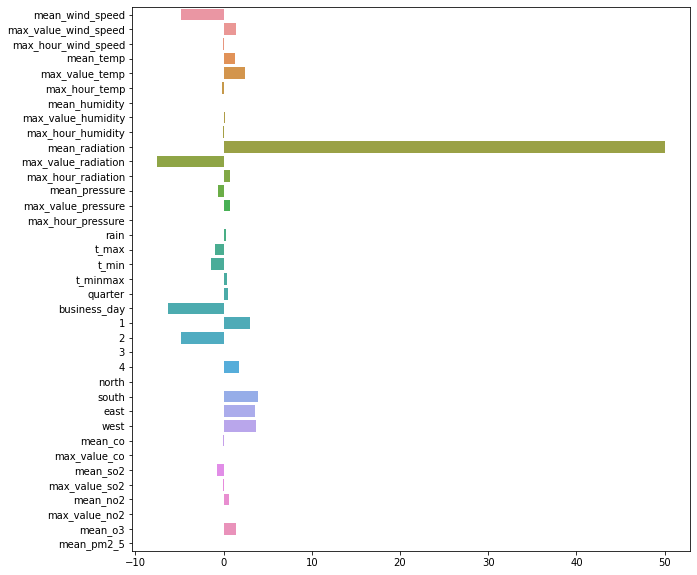

In [33]:
#einfachstes Modell -> linear


lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
score= lin_reg.score(X_test,y_test)
print(f"Score of the model: {score}")

fig_coef, ax_coef = plt.subplots(1,1,figsize=(10,10))
ax_coef = sns.barplot(y=X_train.columns,x=lin_reg.coef_,orient="h")

In [25]:
lin_reg.coef_

array([-4.79833454e+00,  1.42917499e+00, -1.03450678e-01,  1.34994978e+00,
        2.39334794e+00, -1.19931047e-01,  1.01115990e-01,  1.22982429e-01,
       -2.36341894e-02,  4.99993142e+01, -7.48767588e+00,  7.73857211e-01,
       -6.14335452e-01,  7.52685142e-01,  3.29087515e-02,  2.31306862e-01,
       -9.34535289e-01, -1.37140326e+00,  4.36867966e-01,  4.87057780e-01,
       -6.30242619e+00,  3.04908162e+00, -4.85132296e+00,  6.83432884e-02,
        1.73389805e+00,  4.80149254e-12,  3.86467088e+00,  3.60702052e+00,
        3.62581023e+00, -2.21290291e-02,  7.73645059e-03, -7.65124707e-01,
       -1.94456272e-02,  5.72389037e-01,  1.08121318e-01,  1.36496883e+00,
        9.07171256e-02])